# Clean and Analyze Employee Exit Survey
![humanresources](humanresources.jpg)

## Introduction

In this guided project, we'll work with exit surveys from employees of the `Department of Education, Training and Employment (DETE)` and the `Technical and Further Education (TAPE)` institude in Quensland, Australia.
It is required that our conclusions are drawn from the results of both surveys to find the answer for these questions:
1. Do employees who only worked in the institutes for a short period or ones who worked for a long time have a greater possibility of resigning due to some kind of dissatisfaction?
2. Do younger employees or older staff tend to resign due to some kind of dissatisfaction? What about older employees?
3. Which gender has the highest percent of resignation?
4. Which institute has higher percentage of dissatisfied resignation?

To find the answers for our questions, we will dive in 2 datasets:`dete_survey.csv` and `tafe_survey.csv`. These dataset are of unknown provenance. We don't know how the data was collected and no additional information was provided so we need to make assumption on our own. In general, they have some common contents, but the template used for each survey is different so 1 problem in this dataset can be splitted in many columns in another one. Moreover, the survey creator's initial targets diversifies for a lot of purposes, which means that some skills of cleanning, filtering, categorizing data, restructuring dataset, solving missing data...etc. are indispensable. Our main purpose of this project is to practise cleaning data skills but we will also do some analysis and visualization at the end.

#### Summary of results

Our main observations on the group of employee resigning from both institutes are that DETE institute level of resination due to dissatisfaction at work is twice higher than at TAFE. Dissatisfied men are more prone to existing the work place than women, and overall the longer the employee the more dissatisfied he/she was, which led to his leaving from TAFE/DETE. While 2012-2013 is the period DETE saw the most number of staff leaving, 2011-2012 is the peak time recorded in TAFE.

## Connect to our data

In [1]:
# Read in the data
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100 # avoid truncated output
dete_survey = pd.read_csv('dete_survey.csv',na_values ='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

## Initial observations

### dete_survey

In [2]:
# Quick exploration of the data
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### Dropping unrelated columns

This dataset contains 822 rows and 56 columns. The data can be divided into 3 groups:
* Basic information of employees (From the beginning to `Employment Status` column) and 2 columns at the end of the dataset which are informative too: `Gender` and `Age`. They should be kept and clean.
* Reasons for resigning (From the column `Career move to public sector` to `None of the above`). These are what we care about and these all columns contain boolean data type. We will have a closer look at them after.
* Employees' evaluation of the enterprise (from the column called `None of the above` to `Health & Safety`) and the rest of the data (mainly consist Nan values) (from `Aboriginal` to `NESB`), these columns are not really related to our scope and  they contain some vague information, so they should be dropped.  

In [3]:
# Drop redundant columns

# Get index of the columns
ni=dete_survey.columns.get_loc('None of the above')
gi=dete_survey.columns.get_loc('Gender')
ai=dete_survey.columns.get_loc('Aboriginal')

# drop columns
dete_survey = dete_survey.drop(dete_survey.columns[ni:gi],axis=1).drop(dete_survey.columns[ai:], axis=1)

print(dete_survey.shape)
dete_survey.head()

(822, 29)


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,Gender,Age
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,Male,56-60
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,61 or older
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,Female,61 or older


### Simplify column names

In [4]:
name_mapping = {'SeparationType':'separation_type',
                'Dissatisfaction with the department':'department_dissatisfaction',
                'Physical work environment':'work_environment',
                'Lack of recognition':'recognition',
                'Lack of job security':'job_security'}
dete_survey.rename(name_mapping,axis=1,inplace=True)
dete_survey.columns = dete_survey.columns.str.lower().str.replace(' ','_')
dete_survey.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'department_dissatisfaction', 'work_environment',
       'recognition', 'job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload', 'gender', 'age'],
      dtype='object')

### Idenfity missing values

Now our dataset has been shorten, it has only 822 rows and 29 columns. There is something wrong over there: looking at the graph, column `Role Start Date` and `DETE Start Date` are indicated without NaN values, but if we explore the table above (output of `dete_survey.head()` long enough, we see the strange value **Not Stated** which means the missing values. Hence, let's read them as Null values (update in our first step) and then visualize missing data to see the pattern.

<AxesSubplot:>

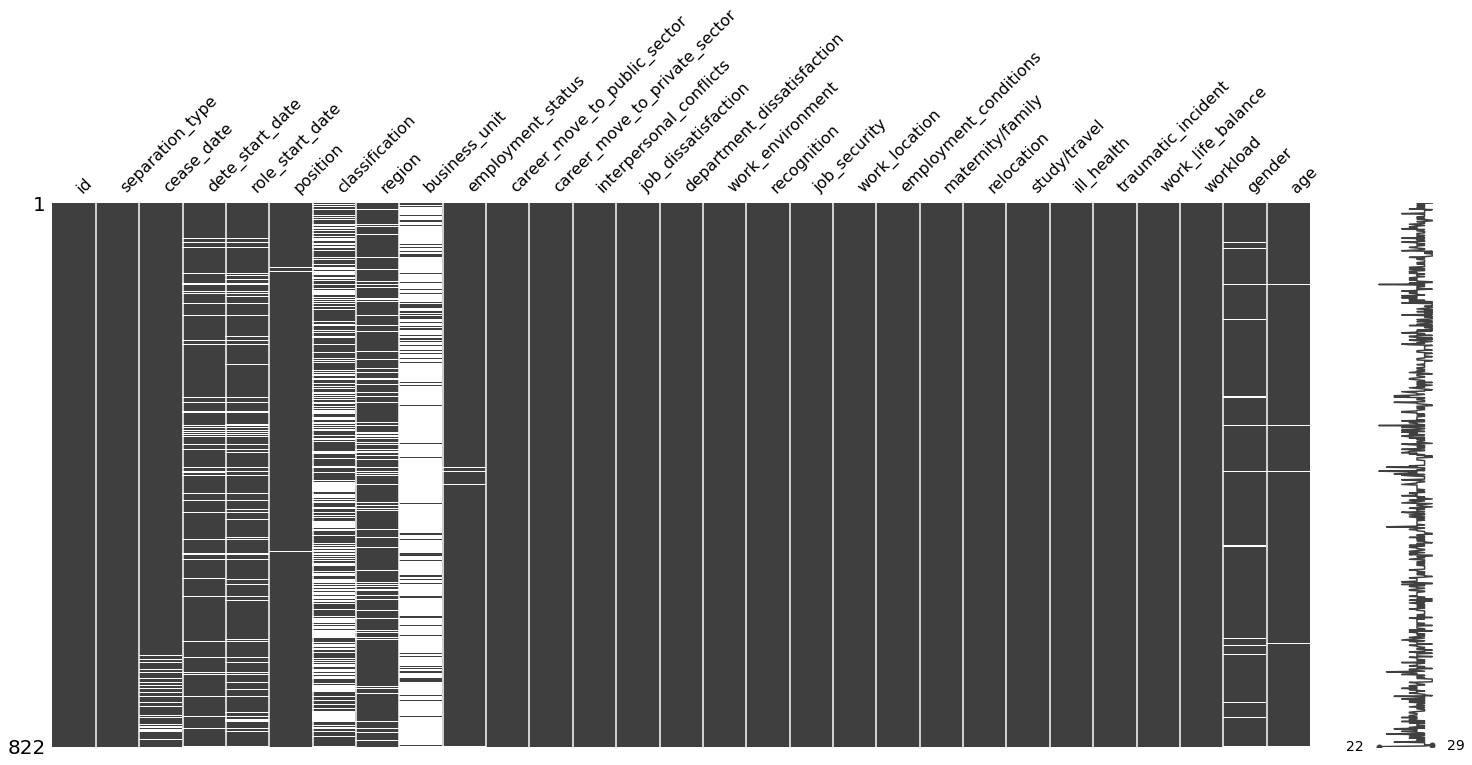

In [5]:
import missingno as msno
msno.matrix(dete_survey)

### Field validation

It's better to understand clearly our data in `dete_survey` before we change to `tafe_survey`. So let's begin our discovery.

In [6]:
# `separation_type` column
dete_survey['separation_type'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

The respondents of this survey belong to different groups, and only 3 of which are the subjects of our research. The names of the groups contains `Resignation` and others should be removed.

In [7]:
dete_survey = dete_survey[dete_survey['separation_type'].str.contains('Resignation')]
dete_survey.shape

(311, 29)

In [8]:
# `Cease Date` column
dete_survey['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
07/2012      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

The data are inconsistent, some have MM/YYYY format and some have YYYY one.

In [9]:
dete_survey['cease_date'] = dete_survey['cease_date'].str.split('/').str[-1].copy()
dete_survey['cease_date'].value_counts(dropna=False)

2013    146
2012    129
2014     22
NaN      11
2010      2
2006      1
Name: cease_date, dtype: int64

In [10]:
# `dete_start_date` column
dete_survey['dete_start_date'].value_counts(dropna=False).sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64

In this step, we extended this anecdotal checks to true validation of the fields, that's why we sorted our data by index
Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.
If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.
So it seems to be fine.

In [11]:
# 'role_start_date' column
dete_survey['role_start_date'].value_counts(dropna=False).sort_index()

200.0      1
1976.0     2
1980.0     1
1982.0     1
1986.0     1
1987.0     2
1988.0     3
1989.0     5
1990.0     1
1991.0     1
1992.0     4
1993.0     3
1994.0     2
1996.0     3
1997.0     5
1998.0     4
1999.0     6
2000.0     1
2001.0     2
2002.0     7
2003.0     6
2004.0    10
2005.0     9
2006.0     7
2007.0    24
2008.0    21
2009.0    18
2010.0    27
2011.0    33
2012.0    37
2013.0    24
NaN       40
Name: role_start_date, dtype: int64

Applying the same concept here, it is very bizarre to see the year 200.0. We will print it to understand more and find the index to drop it.

In [12]:
dete_survey[dete_survey['role_start_date']==200.0]

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,department_dissatisfaction,work_environment,recognition,job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,gender,age
390,391,Resignation-Other employer,2013,2000.0,200.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50


In [13]:
# Find the index of row
dete_survey.reset_index(drop=True, inplace=True)
dete_survey[dete_survey['role_start_date']==200.0].index

Int64Index([137], dtype='int64')

In [14]:
# Drop the row we want
dete_survey.drop(137,axis=0, inplace=True)
dete_survey.shape

(310, 29)

In [15]:
dete_survey.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'department_dissatisfaction', 'work_environment',
       'recognition', 'job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload', 'gender', 'age'],
      dtype='object')

### condense data

Our survey listed some possible reasons for the resignation of the employee, from the column `career_move_to_public_sector` to `workload`, but we only consider whether this reason comes from our institute so it is clear that only some columns are appropriate for analization: `interpersonal_conflicts`, `job_dissatisfaction`, `department_dissatisfaction`, `work_environment`,`recognition`,`job_security`,`work_location`, `employment_conditions`,`work_life_balance` and `workload`

**Merge columns**: it's time to merge all columns in 1 called `dissatisfied`. If any of the these columns contains the "TRUE' value, we will add a 'TRUE' value to a new corresponding column. According to the missing value graph, there is no missing value in these columns , but we will still verify this before using the `DataFrame.any()` method to do the following:

- Return 'TRUE' if any element in the selected columns above is 'TRUE'
- Return 'FALSE' if none element in the selected columns above is 'TRUE'
- Return 'NaN' if the value is NaN

Therefore, below I wrote 'df_vc' function. This function returns dataframe. Dataframe contains output(s) of 'series.value_counts' for 1(or more) column(s). In other words user specifies source dataframe and columns, function will return value_counts for those columns in one dataframe. Basically resulting dataframe can be viewed as collection of couple of columns. In each couple 1st column is unique value and 2nd column is the count of it.

In [16]:
def df_vc(DataFrame, cols=None, normalize=False, sort=True,
          ascending=False, bins=None, dropna=True):
    vc_table_final = None
    for col in cols:
        if cols == None: # we will pass all columns in our function
            cols = range(len(DataFrame.columns))
        if isinstance(col,str):
            col = DataFrame.columns.get_loc(col)
        # create a sub-DataFrame of 2 columns from each coulmn.value_counts()
        vc_table_new = pd.DataFrame(DataFrame.iloc[:,col].value_counts(normalize=normalize,sort=sort, 
                                                          ascending=ascending, bins=bins, dropna=dropna) ) # Now we have a DataFrame with 1 column, indexed by unique values
        #convert index column to normal column, then now we have a DataFrame with 2 columns
        # marked NaN value by name 'NaN' to differentiate it from NaN value created by concaternate columns, which should be removed
        vc_table_new=vc_table_new.reset_index().fillna('NaN') 
        # Rename sub-DataFrame
        column_name={'index':vc_table_new.columns[1],
                     vc_table_new.columns[1]:f'value counts ({vc_table_new.columns[1]})'}
        vc_table_new.rename(columns=column_name,inplace = True)
        # Concatenate with the previous result after each time to create a final DataFrame
        vc_table_final = pd.concat([vc_table_final, vc_table_new], axis=1)
        # Remove NaN value created by concatenation
        vc_table_final=vc_table_final.fillna('')
    return vc_table_final 

In [17]:
dissatisfied_columns = ['interpersonal_conflicts','job_dissatisfaction','department_dissatisfaction', 'work_environment','recognition','job_security','work_location', 'employment_conditions','work_life_balance','workload']
df_vc(dete_survey,dissatisfied_columns,dropna=False)

,interpersonal_conflicts,value counts (interpersonal_conflicts),job_dissatisfaction,value counts (job_dissatisfaction),department_dissatisfaction,value counts (department_dissatisfaction),work_environment,value counts (work_environment),recognition,value counts (recognition),job_security,value counts (job_security),work_location,value counts (work_location),employment_conditions,value counts (employment_conditions),work_life_balance,value counts (work_life_balance),workload,value counts (workload)
0,False,290,False,269,False,281,False,304,False,277,False,296,False,292,False,287,False,242,False,283
1,True,20,True,41,True,29,True,6,True,33,True,14,True,18,True,23,True,68,True,27


In [18]:
dete_survey.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'department_dissatisfaction', 'work_environment',
       'recognition', 'job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload', 'gender', 'age'],
      dtype='object')

From the result, we can confirm that there is no Nan values in these column. It's safe to merge them in 1 column called `dissatisfied`.

In [19]:
dete_survey['dissatisfied'] = dete_survey.loc[:,dissatisfied_columns].any(axis=1,skipna=False)
dete_survey.drop(dissatisfied_columns,axis=1,inplace=True)
dete_survey['dissatisfied'].value_counts(dropna=False)

False    156
True     154
Name: dissatisfied, dtype: int64

In [20]:
# Delete unrelated dissatisfied columns
drop_columns=dete_survey.loc[:,'career_move_to_public_sector':'traumatic_incident'].columns.to_list()
dete_survey.drop(drop_columns,axis=1,inplace=True)
dete_survey.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'gender', 'age', 'dissatisfied'],
      dtype='object')

### tafe_survey

In [21]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

The information is not really readable when the columns' names are too long, so it's better to create a dataframe filled with some useful columns: `data_type` and `non_null_values`

In [22]:
tafe_survey_info = pd.DataFrame({'data_type':tafe_survey.dtypes,
                                 'num_null_values': tafe_survey.isnull().sum()})
tafe_survey_info

,data_type,num_null_values
Record ID,float64,0
Institute,object,0
WorkArea,object,0
CESSATION YEAR,float64,7
Reason for ceasing employment,object,1
...,...,...
CurrentAge. Current Age,object,106
Employment Type. Employment Type,object,106
Classification. Classification,object,106
LengthofServiceOverall. Overall Length of Service at Institute (in years),object,106


In [23]:
tafe_survey.shape

(702, 72)

As we can see, this dataset `tafe_survey` contains 702 rows and 72 columns. Certainly, many columns are not relevant to our questions. We will print all the columns to see which columns are there and try to drop all redundant ones.

In [24]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

#### Restructure data

- Printing a part of data, we realize that there are many columns giving similar details like in `dete_survey` dataframe, with the paraphrased columns' names.
- Some columns can be wrapped in 1 group. These groups are:
    * Contributing Factors / Main Factor
    * InstituteViews
    * WorkUnitViews
    * Induction
    * Workplace
- However, we only concern whether employees are dissatisfied at work, so let's condense our data about dissatisfaction in 1 column called `dissatisfied` in each table.

In [25]:
pattern = r'Factors*'
factor_columns=tafe_survey.columns[tafe_survey.columns.str.contains(pattern,na=False)].to_list()
factor_columns

['Contributing Factors. Career Move - Public Sector ',
 'Contributing Factors. Career Move - Private Sector ',
 'Contributing Factors. Career Move - Self-employment',
 'Contributing Factors. Ill Health',
 'Contributing Factors. Maternity/Family',
 'Contributing Factors. Dissatisfaction',
 'Contributing Factors. Job Dissatisfaction',
 'Contributing Factors. Interpersonal Conflict',
 'Contributing Factors. Study',
 'Contributing Factors. Travel',
 'Contributing Factors. Other',
 'Contributing Factors. NONE',
 'Main Factor. Which of these was the main factor for leaving?']

The list of columns in tafe_survey we would like to keep includes: `Contributing Factors. Dissatisfaction`,`Contributing Factors. Job Dissatisfaction` and `Contributing Factors. Interpersonal Conflict`

In [26]:
related_factors_columns = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction','Contributing Factors. Interpersonal Conflict']

<AxesSubplot:>

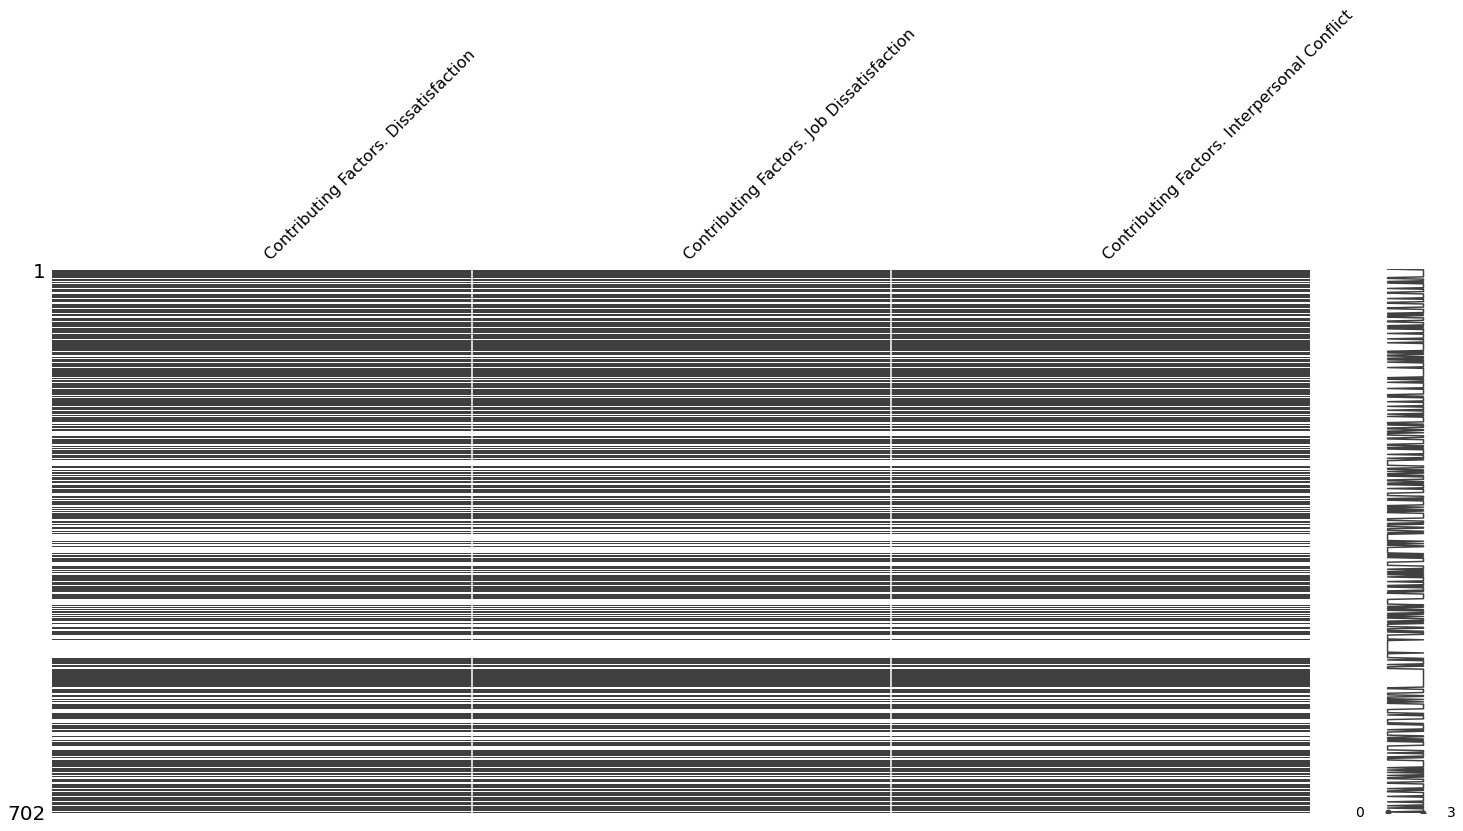

In [27]:
# Visualize missing data
msno.matrix(tafe_survey.loc[:,related_factors_columns])

**Merge columns**: We will apply the same rule like in dete_survey: merge all 3 columns in 1 called `dissatisfied`. If any of the these columns contains the "TRUE' value, we will add a 'TRUE' value to a new corresponding column. Because the missing value pattern in 3 columns is identical, we will use the `DataFrame.any()` method to do the following:

- Return 'TRUE' if any element in the selected columns above is 'TRUE'
- Return 'FALSE' if none element in the selected columns above is 'TRUE'
- Return 'NaN' if the value is NaN

In [28]:
# Check data
tafe_survey['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         371
NaN                                       265
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [29]:
tafe_survey['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      360
NaN                    265
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [30]:
tafe_survey['Contributing Factors. Interpersonal Conflict'].value_counts(dropna=False)

-                         410
NaN                       265
Interpersonal Conflict     27
Name: Contributing Factors. Interpersonal Conflict, dtype: int64

We see the same pattern here, there are some places marked as '-', it seems to be more logic to assume this as 'False', other strings as 'True' and NaN should be kept as it is.

In [31]:
# Create a function to update strange values
def correct_value(elem):
    if elem == '-':
        return False
    elif pd.isnull(elem):
        return np.nan
    return True

In [32]:
# transform data
tafe_survey.loc[:,factor_columns]=tafe_survey.loc[:,factor_columns].applymap(correct_value)

In [33]:
# Merge 3 columns in 1 called `dissatisfied` and drop other columns in group "factor_columns"
tafe_survey['dissatisfied'] = tafe_survey.loc[:,['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction','Contributing Factors. Interpersonal Conflict']].any(axis=1,skipna=False)
tafe_survey.drop(factor_columns,axis=1,inplace=True)
tafe_survey['dissatisfied'].value_counts(dropna=False)

False    315
NaN      265
True     122
Name: dissatisfied, dtype: int64

All data of employees' dissatisfaction of their work have been condensed in 1 column, it would be better for our analysis. Other groups are not of our scope so it should be dropped.

In [34]:
index1=tafe_survey.columns.get_loc('InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction')
index2=tafe_survey.columns.get_loc('Gender. What is your Gender?')

# drop columns
tafe_survey = tafe_survey.drop(tafe_survey.columns[index1:index2],axis=1)

### Clean tafe_survey column names

Each dataframe contains many of the same columns, but the column names are different. It's time to simplify column names and make them consistent.

In [35]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment', 'Gender. What is your Gender?',
       'CurrentAge. Current Age', 'Employment Type. Employment Type',
       'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)',
       'dissatisfied'],
      dtype='object')

In [36]:
dete_survey.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'gender', 'age', 'dissatisfied'],
      dtype='object')

*Noticeable observation*: Each dataframe contains many of the same columns, but the column names are different. We will try to find out the columns with the same content in tafe_survey_updated dataframe and rename those columns with the same name like in the dete_survey:

In [37]:
# Rename `tafe_survey_updated` by using DataFrame.rename() method
transform = {'Record ID': 'id',
             'CESSATION YEAR': 'cease_date',
             'Reason for ceasing employment': 'separation_type',
             'Gender. What is your Gender?': 'gender',
             'CurrentAge. Current Age': 'age',
             'Employment Type. Employment Type': 'employment_status',
             'Classification. Classification': 'position',
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
             'Institute': 'region'}
tafe_survey.rename(transform, axis=1, inplace=True)
tafe_survey.columns

Index(['id', 'region', 'WorkArea', 'cease_date', 'separation_type', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied'],
      dtype='object')

### Filter the Data - Drop rows

In the last screen, we renamed the columns that we'll use in our analysis. Next, let's filter on the rows. Like in dete_survey table, tafe_survey also has `separation_type` which categorize all the leaving of employees, but our target group is resignating employees only.

In [38]:
tafe_survey['separation_type'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separation_type, dtype: int64

As we expected, there are many reasons for the exit of the employees; however, we only care about the group of resignation which is marked with string 'Regination', which is true for only 340 employees ,so let's drop others.

In [39]:
tafe_survey = tafe_survey.loc[tafe_survey['separation_type']=='Resignation',:]
tafe_survey.shape

(340, 12)

### Create New Columns

As we can see, the data displays in 2 dataframes are a little bit different. We will look at some columns with related content:

| dete_resignations           |  tafe_resignations                          | meaning                                    |
|:------------------|:------------------------------------------------------|:-------------------------------------------|
| 'cease_date'              | 'cease_date' |"The year or month the person's employment ended"|
| 'dete_start_date'  | 'institute_service'          |"The year the person began employment with the DETE."|
| 'role_start_date'      | 'role_service'       |"Length of Service at current workplace / role"|
 


As required, we will concatenate 2 dataframes into 1 dataframe so it would be better to create 2 new columns in `dete_survey` like the two ones in `tafe_survey` from what we have.

In [40]:
# Create 2 new columns showing the time working at the institute and at the last position of employee
dete_survey['cease_date']=dete_survey['cease_date'].astype(float)
dete_survey['institute_service'] = dete_survey['cease_date'] - dete_survey['dete_start_date']
dete_survey['role_service'] = dete_survey['cease_date'] - dete_survey['role_start_date']

# Drop 2 unnecessary columns
dete_survey.drop(['dete_start_date','role_start_date'],axis=1,inplace=True)

And then we will also verify each of these columns in case there exists inconsistence. For example, since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.

In [65]:
dete_survey['cease_date'] = dete_survey['cease_date'].astype(float)
print('institute_service:',dete_survey['institute_service'].describe())
print('\n')
print('role_service:',dete_survey['role_service'].describe())

institute_service: count    271.000000
mean      10.483395
std        9.950558
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64


role_service: count    262.000000
mean       6.301527
std        7.174663
min        0.000000
25%        1.000000
50%        4.000000
75%        8.750000
max       36.000000
Name: role_service, dtype: float64


It seems to be nothing strange with `institute_service` column, in `role_service` the minimum value is -1, which doesn't make sense as time can't be negative value. Let's have a look over the whole row that has the `institute_service` value less than 0.

In [42]:
dete_survey.loc[dete_survey['role_service'] < 0,:]

,id,separation_type,cease_date,position,classification,region,business_unit,employment_status,gender,age,dissatisfied,institute_service,role_service
166,460,Resignation-Move overseas/interstate,2012.0,Public Servant,AO5-AO7,Central Office,Information and Technologies,Temporary Full-time,Female,36-40,False,1.0,-1.0


There is only 1 strange case with 'role_service' value (-1), we should drop it.

In [43]:
dete_survey=dete_survey.drop(dete_survey[dete_survey['role_service']==-1].index, axis = 0)
dete_survey.shape

(309, 13)

After dropping, our `dete_survey` dataframe has 309 rows only. We need to check each columns corresponding of `tafe_survey` dataframe, including `cease_date`, `institute_service`,`role_service`.

In [44]:
print('cease_date column:', tafe_survey['cease_date'].describe())
print('\n')
print('institute_service column:', tafe_survey['institute_service'].describe())
print('\n')
print('role_service column:', tafe_survey['role_service'].describe())
print('\n')

cease_date column: count     335.000000
mean     2011.394030
std         1.005952
min      2009.000000
25%      2011.000000
50%      2011.000000
75%      2012.000000
max      2013.000000
Name: cease_date, dtype: float64


institute_service column: count                  290
unique                   7
top       Less than 1 year
freq                    73
Name: institute_service, dtype: object


role_service column: count                  290
unique                   7
top       Less than 1 year
freq                    92
Name: role_service, dtype: object




The `cease_date` column is shown in float as its data type, which are year values, while  `institute_service` and `role_service` imply data in string. They have been catergorized. But until now, overall there aren't major issues with the years. We will use these columns to analyze survey respondents according to their length of employment after.

### Concatenate 2 dataframes

Until now, we have accomplished the following:
* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created some new columns like `institute_service` and `role_service`
* Cleaned the `Contributing Factors` columns
* Creating a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the `institute_service` column.

- Firstly, let's add a new column to our dataframe that will allow us to easily distinguish between the two. To do so, we will add a new column named 'institute' to each dataframe, each row should contain 'DETE' or 'TAFE', corresponding to its dataframe.
- Then, 2 dataset are concaternated in 1 set, named 'combined'.

In [45]:
# In each dataset, add a new column named 'institute' 
dete_survey['institute'] = 'DETE'
tafe_survey['institute'] = 'TAFE'

# Concatenate 2 datasets in 1
combined = pd.concat([dete_survey,tafe_survey])
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 701
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 649 non-null    float64
 1   separation_type    649 non-null    object 
 2   cease_date         633 non-null    float64
 3   position           596 non-null    object 
 4   classification     159 non-null    object 
 5   region             603 non-null    object 
 6   business_unit      31 non-null     object 
 7   employment_status  595 non-null    object 
 8   gender             590 non-null    object 
 9   age                594 non-null    object 
 10  dissatisfied       641 non-null    object 
 11  institute_service  561 non-null    object 
 12  role_service       552 non-null    object 
 13  institute          649 non-null    object 
 14  WorkArea           340 non-null    object 
dtypes: float64(2), object(13)
memory usage: 81.1+ KB


Our new DataFrame `combined` now remains 649 rows and 16 columns. 

<AxesSubplot:>

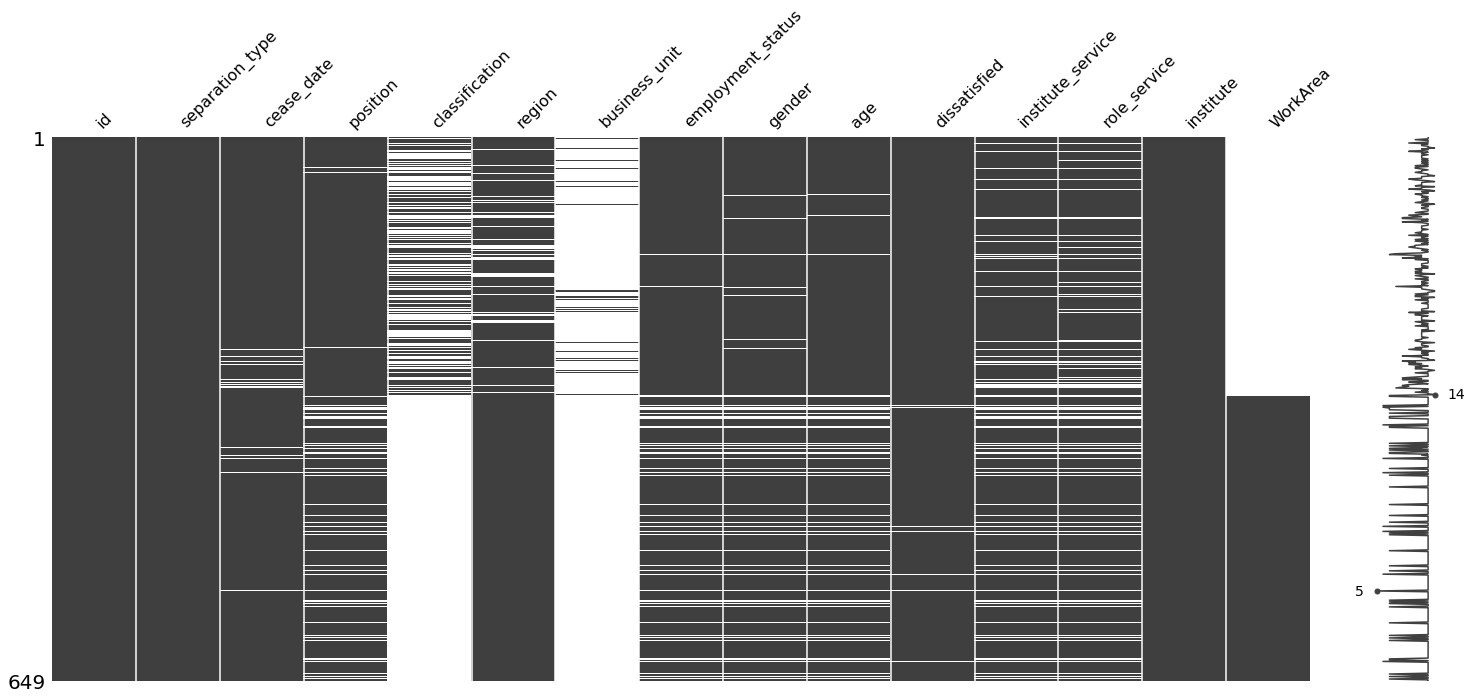

In [46]:
msno.matrix(combined)

Some columns appear only in one of the dataset, we will check if they imply the same information  before dropping because our requirement is that the answers based on both surveys. We will also print the column `institute` to see from which survey they come from.

In [47]:
combined[['institute','classification','business_unit','WorkArea']]

,institute,classification,business_unit,WorkArea
0,DETE,Primary,NaN,NaN
1,DETE,NaN,Education Queensland,NaN
2,DETE,Secondary,NaN,NaN
3,DETE,NaN,NaN,NaN
4,DETE,Secondary,NaN,NaN
...,...,...,...,...
696,TAFE,NaN,NaN,Non-Delivery (corporate)
697,TAFE,NaN,NaN,Delivery (teaching)
698,TAFE,NaN,NaN,Non-Delivery (corporate)
699,TAFE,NaN,NaN,Delivery (teaching)


We can't see any clear connection between any columns so just drop them.

In [48]:
combined.drop(['classification','business_unit','WorkArea'], axis=1, inplace=True)

### Cleaning `institute service` column

After merging 2 datasets in 1 and printing out some beginning and ending rows, we can see that in `institute_service` column the rows of TAFE institute are catergorized, while those of DETE are just the number of years each worker spended in there. We will print out unique values to understand this column better.

In [49]:
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
7-10                  21
1.0                   21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   7
15.0                   7
20.0                   7
17.0                   6
10.0                   6
12.0                   6
14.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
19.0                   3
39.0                   3
32.0                   3
36.0                   2
26.0                   2
28.0                   2
30.0                   2
25.0                   2


Based on the way, TAFE categorized the survey respondents and this [reference](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), we will classsify our data into these groups:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Let's categorize the values in the `institute_service` column using the definitions above. We will write a function named `categorize`  to do so then use Series.apply() method to pass value into the functions element-wise.

In [50]:
def categorize(elem):
    grp1, grp2, grp3, grp4 = 'New (<3)', 'Experienced (3-6)', 'Established (7-10)', 'Veteran (>11)'
    # Categorize NaN values
    if pd.isna(elem):
        return np.nan
    # Categorize string values
    elif isinstance(elem, str):
        if elem == 'Less than 1 year': return grp1
        elif elem == '1-2': return grp2
        elif (elem == '3-4')|(elem == '5-6'): return grp3
        elif elem == '7-10': return grp3
        elif (elem == '11-20')|(elem == 'More than 20 years'): return grp4
        elif pd.isnull(val): return np.nan
        else: return 'Unidentified values'
    #Categorize numeric values
    elif isinstance(elem, (int,float)):
        if elem < 3: return grp1
        elif 3 <= elem < 7: return grp2
        elif 7 <= elem < 11: return grp3
        elif elem >=11: return grp4
        elif pd.isnull(val): return np.nan
    # In case, there are strange values.
    else: return "unexpected data type"
    
# Apply the function elemen-wise on our series
combined['service_cat'] = combined['institute_service'].apply(categorize)
combined['service_cat'].value_counts(dropna=False)
#combined_updated['service_cat'].describe()

Established (7-10)    158
Experienced (3-6)     140
Veteran (>11)         135
New (<3)              128
NaN                    88
Name: service_cat, dtype: int64

### Change a data type of column to 'category' with a new logical order

Our `service_cat` column has data type as object, which implies to be string. That column would be used like an index column in the folowing task when we use pivot_table to aggregate our data. However, we would like to sort our new index following an acsending trend of working experience so that we can make easier comparison of values among groups in pivot table and plot so let's do that.

In [51]:
from pandas.api.types import CategoricalDtype
cat_order = CategoricalDtype(['New (<3)','Experienced (3-6)','Established (7-10)','Veteran (>11)'],ordered=True)
combined['service_cat'] = combined.service_cat.astype(cat_order)

### Classify age column
As we can see, the way to categorize employees in both institute is pretty similar and there is some difference in the format only. We will clean the `age` column as follows:
* Use vectorize method to remove any unnecessary spaces before and after category, add '-' between two ages 
* In our combined data, we will convert '56-60','61 or older' and '56 or older' to '56-∞'; convert '20 or younger' to '0-20'


In [52]:
combined['age'] = combined['age'].str.replace('56-60','56-∞').str.replace('61 or older','56-∞').str.replace('56 or older','56-∞').str.replace('20 or younger','0-20').str.replace('  ','-')
combined['age'].value_counts().sort_index()

0-20     10
21-25    62
26-30    67
31-35    61
36-40    72
41-45    93
46-50    80
51-55    71
56-∞     78
Name: age, dtype: int64

### Solving missing values

Before analysing, recall that `dissatisfied` column consists of 3 types of unique values: `False`, `True` and `NaN`, so we need to clean this column before aggrigating, containing some steps as follows: 

* Step1: Use the Series.value_counts() method to confirm if the number of True and False in the dissatisfied column. Set the dropna parameter to False to also confirm the number of missing values.
* Step 2: Use the Series.fillna() method to replace the missing values in the dissatisfied column with the value that occurs most frequently in this column, either True or False.

In [53]:
combined['dissatisfied'].value_counts(dropna = False)

False    390
True     251
NaN        8
Name: dissatisfied, dtype: int64

We have 8 NaN values and most of our data are False. Hence, we will use the Series.fillna() [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html) to fill 'False' in empty positions.

In [54]:
combined['dissatisfied']=combined['dissatisfied'].fillna(False)
combined['dissatisfied'].value_counts(dropna = False)

False    398
True     251
Name: dissatisfied, dtype: int64

In [55]:
# Our final table
print(combined.shape)
combined.head()

(649, 13)


,id,separation_type,cease_date,position,region,employment_status,gender,age,dissatisfied,institute_service,role_service,institute,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Central Queensland,Permanent Full-time,Female,36-40,False,7,6,DETE,Established (7-10)
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Central Office,Permanent Full-time,Female,41-45,True,18,15,DETE,Veteran (>11)
2,9.0,Resignation-Other reasons,2012.0,Teacher,North Queensland,Permanent Full-time,Female,31-35,False,3,3,DETE,Experienced (3-6)
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,NaN,Permanent Part-time,Female,46-50,True,15,4,DETE,Veteran (>11)
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Far North Queensland,Permanent Full-time,Male,31-35,False,3,3,DETE,Experienced (3-6)


<AxesSubplot:>

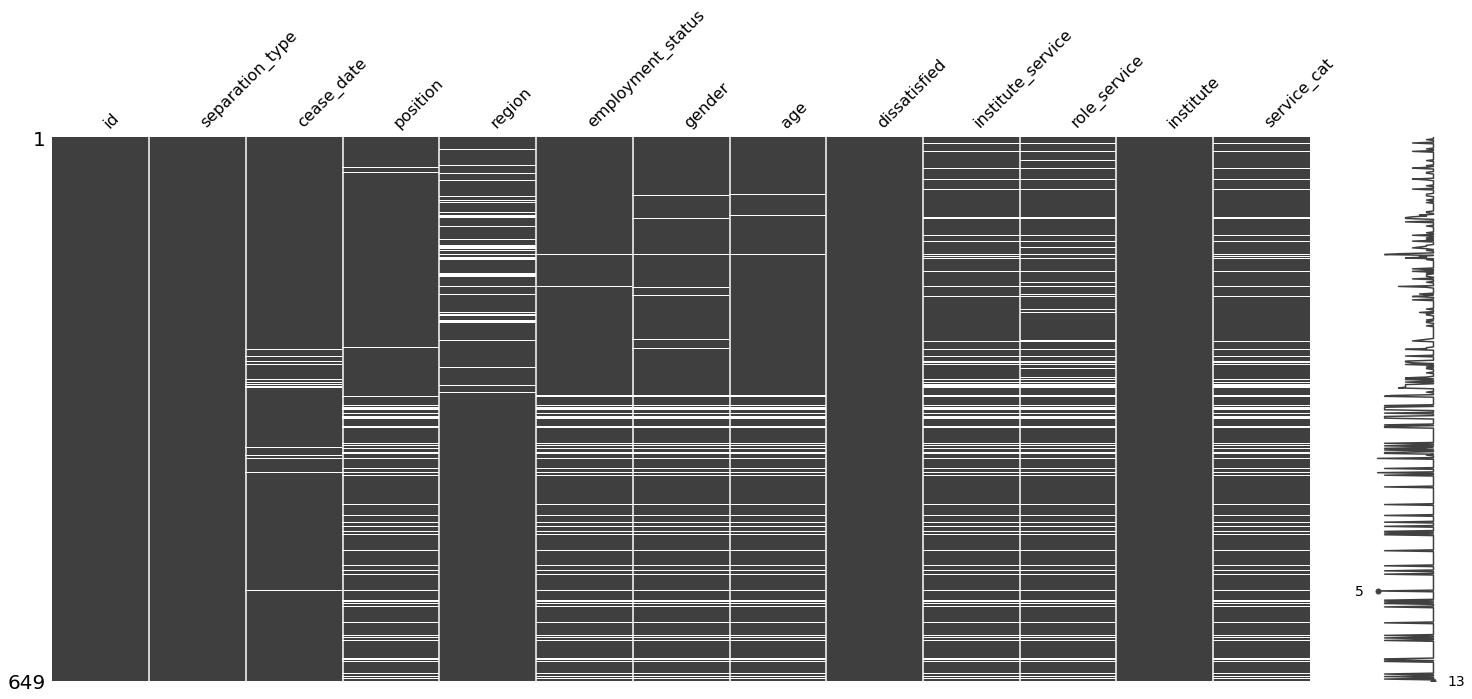

In [56]:
msno.matrix(combined)

## Data analysis

### Question 1:
Now we are nearly ready to answer our first question: *Do employees who only worked in the institutes for a short period or ones who worked for a long time have a greater possibility of resigning due to some kind of dissatisfaction?*
To do so, we will use df.pivot_table() [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) to solve it, where index = `service_cat`, values =`dissatisfied`. Methods such as the df.pivot_table() method actually treat Boolean values as integers, so a True value is considered to be 1 and a False value is considered to be 0. 

Next, we will use the DataFrame.pivot_table() method to calculate the percentage of dissatisfied employees in each service_cat group and then use grid chart to visualize our results.

**Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees**. The default aggregation function is the mean, so we can exclude the aggfunc argument.

In [57]:
result_1_sep = combined.pivot_table(index = ['service_cat'],values = 'dissatisfied',columns='institute')*100
result_1_comb = combined.pivot_table(index = 'service_cat',values = 'dissatisfied')*100
result_1_comb = result_1_comb.reset_index()
print('Percentage of resignation in both institutes, categorized by working time:')
result_1_comb.columns = ['service_cat','service_cat_percentage']
result_1_comb

Percentage of resignation in both institutes, categorized by working time:


,service_cat,service_cat_percentage
0,New (<3),33.593750
1,Experienced (3-6),38.571429
2,Established (7-10),36.708861
3,Veteran (>11),51.111111


Before creating grid chart containing 3 subplots, we will separate the data belonging to DETE from data belonging to TAFE into 2 different subset named respectively: `dete_sub` and `tafe_sub`.

In [58]:
dete_sub = result_1_sep['DETE']
dete_sub = dete_sub.reset_index()
dete_sub.columns = ['dete_service_cat','dete_service_cat_percentage']
print(dete_sub)
print('\n')
tafe_sub = result_1_sep['TAFE']
tafe_sub = tafe_sub.reset_index()
tafe_sub.columns = ['tafe_service_cat','tafe_service_cat_percentage']
print(tafe_sub)

     dete_service_cat  dete_service_cat_percentage
0            New (<3)                    40.000000
1   Experienced (3-6)                    46.052632
2  Established (7-10)                    60.975610
3       Veteran (>11)                    59.595960


     tafe_service_cat  tafe_service_cat_percentage
0            New (<3)                    28.767123
1   Experienced (3-6)                    29.687500
2  Established (7-10)                    28.205128
3       Veteran (>11)                    27.777778


Bellow, we will use matplotlib's function approach to build the graphs because it offers more flexibility in arranging the subplots.
* We first build two of the graphs on a 2-by-2 grid (this grid should have 4 subplots, but we only build 2, the bottom row remains empty).
* We then build only the bottom graph of 2-by-1 grid (this grid should have 2 subplots, but we build only the bottom row and the top row remains empty)
* The two grids are merged, and we end up with two graphs on the top row and 1 graph on the bottom row.

<ipython-input-59-a2b115d61f88>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['New','Experienced','Established','Veteran'],rotation=30,size=8,alpha=0.6)


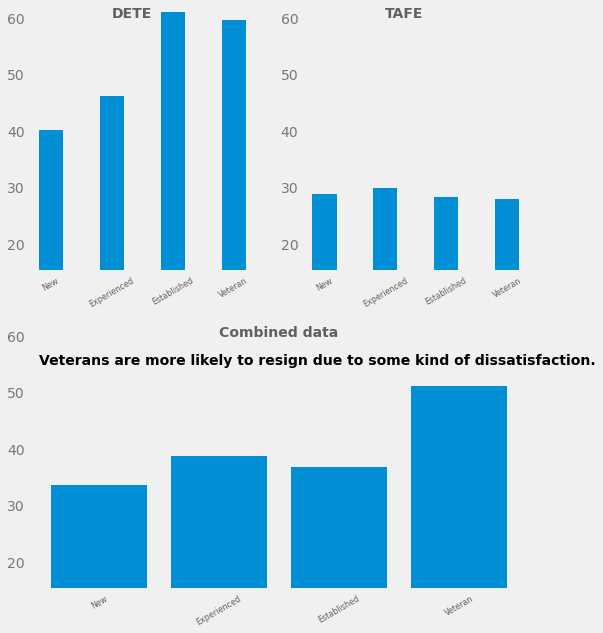

In [59]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(8,10))
ax1 = plt.subplot(2,2,1) # the graph in the 2-by-2 grid and in the first position
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2) # the graph in a new 2-by-1 grid and the second position
axes = [ax1, ax2, ax3]


# Changes to all the subplots
for ax in axes:
    ax.set_xticklabels(['New','Experienced','Established','Veteran'],rotation=30,size=8,alpha=0.6)
    ax.set_ylim(15,62)
    ax.grid(False)

# Ax1: DETE
ax1.bar(dete_sub['dete_service_cat'],dete_sub['dete_service_cat_percentage'],width=0.4)
ax1.set_yticks([20,30,40,50,60])
ax1.set_yticklabels([20,30,40,50,60],alpha=0.5)
ax1.text(x=1, y=60, s='DETE',weight='bold',alpha=0.6)

# Ax2: TAFE
ax2.bar(tafe_sub['tafe_service_cat'],tafe_sub['tafe_service_cat_percentage'],width=0.4)
ax2.text(x=1, y=60, s='TAFE', weight='bold',alpha=0.6)
ax2.set_yticks([20,30,40,50,60])
ax2.set_yticklabels([20,30,40,50,60],alpha=0.5)

#Ax3: Combined data
ax3.bar(result_1_comb['service_cat'],result_1_comb['service_cat_percentage'])
ax3.set_yticks([20,30,40,50,60])
ax3.set_yticklabels([20,30,40,50,60],alpha=0.5)
ax3.text(x=1, y=60, s='Combined data',weight='bold',alpha=0.6)

# Adding a title and a subtitle
ax3.text(-0.5,55,'Veterans are more likely to resign due to some kind of dissatisfaction.',weight='bold')
plt.show()

### Question 2: 
Now we will use DataFrame.pivot_table() method to answer to this question: *Do younger employees or older staff tend to resign due to some kind of dissatisfaction?* We will calculate the percentage of dissatisfied employees in each group of age and visualize our result.

In [60]:
age_dis_per = combined.pivot_table(index='age',values='dissatisfied')*100
age_dis_per.sort_values(by='dissatisfied',ascending=False)

,dissatisfied
age,
51-55,46.478873
26-30,43.283582
56-∞,42.307692
46-50,40.000000
31-35,39.344262
41-45,38.709677
36-40,37.500000
21-25,30.645161
0-20,30.000000


A group of people between 51-55 years old counts for the highest percentage of 46% (i.e. in 51-55 group, 46% of total employees in that group resigned because of dissatisfaction). From the received results, we can conclude that the age doesn't have much effect on people's decision of resignation. The gap between different group isn't significant. 

### Question 3
*Which gender has the highest percent of resignation?*

In [61]:
combined.pivot_table(index='gender',values='dissatisfied',dropna=False)

,dissatisfied
gender,
Female,0.388626
Male,0.416667


Male counts for higher proportion of 41.6%; however, the difference between 2 genders is not remarkable.

### Question 4

*Which institute has higher percentage of dissatisfied resignation? What is the peak time of employee exiting in both institutes?*

In [62]:
institute_percentage = combined.pivot_table(index='institute',values='dissatisfied',dropna=False)
institute_percentage

,dissatisfied
institute,
DETE,0.498382
TAFE,0.285294


Text(-0.001, 1.5, 'The percentage of DETE staff dissatisfied is twice that of TAFE')

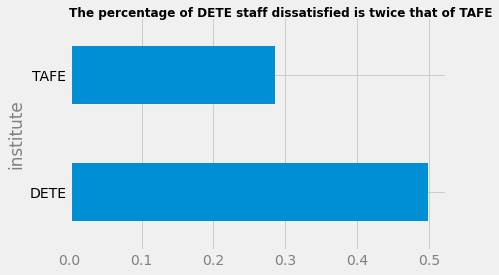

In [63]:
# visualize our data

ax=institute_percentage.plot(kind = 'barh', legend = False)

ax.tick_params(axis='x', colors='grey')
ax.set_ylabel('institute',color='grey')
ax.text(-0.001,1.5,'The percentage of DETE staff dissatisfied is twice that of TAFE',size = 12, weight ='bold')

<AxesSubplot:xlabel='institute', ylabel='cease_date'>

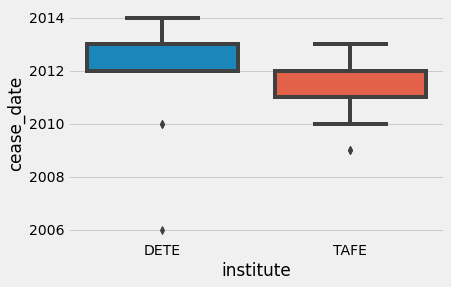

In [64]:
import seaborn as sns
sns.boxplot(x = combined.institute, y=combined.cease_date)

## Conclusion

Until now, we have gone a long way. Let's sum up what we have done.

- We started with diagnosing data for cleaning, looking for area of interest, based on which we filtered our related data and then simplified our columns name, make some field and value validation.
- Detecting missing value, we also successed to recognize some *hidden* NULL values, which were recorded as '-'. To tackle with this type of data (NaN), sometimes we filled with the most popular value in the same field, in some places we replaced it with logical appropriate value (We assumed '-' in tafe survey as False value). There was time when we also kept empty values as they are and we also chose to drop them.
- Writing a function to automatically return the value_count() of DataFrame.
- Categorize our data and customize the index following our desired order.
- Visualize exploratory data analysis

And finally, we came up with some interesting points:
- Dissatisfaction at work has the most effect on veterans (who commited themselve to the institute more than 11 years).
- The age and gender of employee doesn't much matter employee's leaving when they are dissapointed.
- DETE should pay much more attention on improving their working environment than TAFE.